In [1]:
#משימות שלי
#ממצוע כל עמודה ביחס לשכבת גיל שלה
#הצגת גרפים כמו שליהי עשתה

#upload the data
!pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #for reshaping graph size
import seaborn as sns  # for creating the graphs

# Replace 'your_file.csv' with the path to your CSV file
url="https://raw.githubusercontent.com/roeiraz12/project/main/onlinedeliverydata.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(url)

In [2]:
df.shape

(388, 55)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    object 
 2   Marital Status                             388 non-null    object 
 3   Occupation                                 388 non-null    object 
 4   Monthly Income                             388 non-null    object 
 5   Educational Qualifications                 388 non-null    object 
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

In [4]:
column_names = df.columns
column_names


Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Medium (P1)', 'Medium (P2)', 'Meal(P1)', 'Meal(P2)',
       'Perference(P1)', 'Perference(P2)', 'Ease and convenient',
       'Time saving', 'More restaurant choices', 'Easy Payment option',
       'More Offers and Discount', 'Good Food quality', 'Good Tracking system',
       'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene',
       'Bad past experience', 'Unavailability', 'Unaffordable',
       'Long delivery time', 'Delay of delivery person getting assigned',
       'Delay of delivery person picking up food', 'Wrong order delivered',
       'Missing item', 'Order placed by mistake', 'Influence of time',
       'Order Time', 'Maximum wait time', 'Residence in busy location',
       'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time',
       'Delivery person ability', 'Influence of 

**:המרת עמודת מטקסט למספר**

In [5]:
#changing the text value in numeric values in some coulomns:


column_names = df.columns
column_names


#new dictionary 
mapping = {
    'Strongly agree': 5,
    'Strongly Agree': 5,
    'Agree': 4,
    'Neutral': 3,
    'Disagree': 2,
    'Strongly disagree': 1
}

#new dictionary 
mapping2 = {
    'Very Important': 5,
    'Important': 4,
    'Moderately Important': 3,
    'Slightly Important': 2,
    'Unimportant': 1
}

#new dictionary 
mapping3 = {
    'Strongly agree': 1,
    'Strongly Agree': 1,
    'Agree': 2,
    'Neutral': 3,
    'Disagree': 4,
    'Strongly disagree': 5
}

mapping4 = {
    ' Web browser': 1,
    ' Direct call': 2,
    ' Walk-in': 3,
}

# List of columns to apply the mappings to
columns = [
    'Ease and convenient', 'Time saving', 'Easy Payment option',
    'Good Food quality', 'Good Tracking system',
    'Self Cooking', 'Health Concern', 'Unavailability', 'Residence in busy location',
    
    'Unaffordable','Delivery person ability', #?חייב לציין שלא הבנתי מה העמודות מכאן והלאה אומרות
     'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time']

columns2 = [
    'Less Delivery time',
    'High Quality of package', 'Number of calls', 'Politeness',
    'Freshness ', 'Temperature', 'Good Taste ', 'Good Quantity']

columns3 = [   
    'More restaurant choices','More Offers and Discount','Late Delivery', 'Poor Hygiene', 'Bad past experience', 'Long delivery time', 'Delay of delivery person getting assigned','Delay of delivery person picking up food', 'Wrong order delivered',
    'Missing item', 'Order placed by mistake']
  

columns4 = ['Medium (P2)']

# Apply the mapping to each specified column using .map()
for col in columns:
    if col in df.columns:
        df[col] = df[col].map(mapping)

# Apply the second mapping to each specified column using .map()
for col in columns2:
    if col in df.columns:
        df[col] = df[col].map(mapping2)

# Apply the third mapping to each specified column using .map()
for col in columns3:
    if col in df.columns:
        df[col] = df[col].map(mapping3)
        
# Apply the third mapping to each specified column using .map()
for col in columns4:
    if col in df.columns:
        df[col] = df[col].map(mapping4)

# Display the updated dataframe
df


,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,3,3,3,3,3,3,3,3,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,5,5,5,5,5,5,5,5,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,4,5,3,5,5,4,5,3,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,5,4,3,5,5,5,5,4,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,4,4,3,4,4,4,5,5,Yes,NIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,...,4,4,4,4,4,4,4,4,Yes,Nil
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,...,3,5,3,3,3,3,5,5,Yes,Nil
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,...,4,5,4,4,5,5,5,5,Yes,Nil
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,...,4,5,4,5,5,4,5,5,Yes,Language barrier is also one major issue. Mosl...


****:יצירת עמודה חדשה שתקרא "דירוג כולל" הבנויה מממוצע הציונים בכל קטגוריה**** 

In [6]:
#creating a new coulomn called "Overall Rating" between 1-5:
#average rating of each category
#
columns_to_average = ['Ease and convenient', 'Time saving', 'Easy Payment option',
    'Good Food quality', 'Good Tracking system', 'Delivery person ability','Less Delivery time','High Quality of package',
    'Politeness','Freshness ', 'Temperature', 'Good Taste ', 'Good Quantity', 
    'More restaurant choices','More Offers and Discount','Late Delivery', 'Poor Hygiene', 'Bad past experience',
    'Long delivery time', 'Delay of delivery person getting assigned','Delay of delivery person picking up food','Wrong order delivered',
    'Missing item', 'Order placed by mistake']
df["Overall Rating"] = df[columns_to_average].mean(axis=1)


df[["Overall Rating"]] #we can see the overall rating of each castumer down here:

,Overall Rating
0,2.750000
1,3.041667
2,3.166667
3,3.541667
4,3.125000
...,...
383,3.041667
384,3.000000
385,2.958333
386,3.416667


**:ניתן לראות שככל שהגיל של המשתמש עולה הדירוג הממוצע יורד**

In [7]:
#עשיתי ממוצע  לדירוג לכל שכבת גיל. הפלט יהיה בסדר יורד של הדירוג  
rating_df = df.groupby(['Age'])[['Overall Rating']].mean().reset_index().sort_values(by="Age" , ascending = True)
rating_df

,Age,Overall Rating
0,18,3.583333
1,19,3.406250
2,20,3.486111
3,21,3.436594
4,22,3.397661
5,23,3.295662
6,24,3.413333
7,25,3.399840
8,26,3.335714
9,27,3.214286


-0.59 :מקדם מתאם הקורולציה


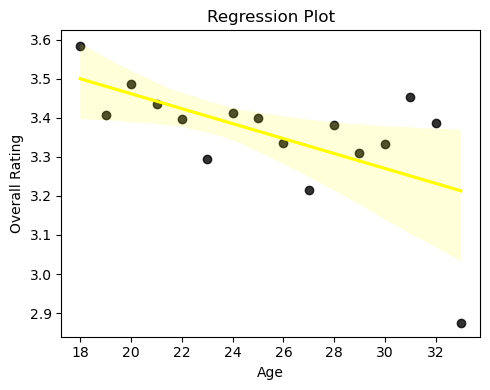

In [8]:
#גרף רגרסיה 
from scipy.stats import pearsonr

plt.figure(figsize=(5,4))
sns.regplot(x=rating_df["Age"], y=rating_df["Overall Rating"], line_kws={"color": "yellow"}, scatter_kws={"color": "black"})
plt.title('Regression Plot')
plt.xlabel('Age')
plt.ylabel("Overall Rating")

r_value, _ = pearsonr(rating_df["Age"], rating_df["Overall Rating"])
rounded_r_value = round(r_value, 2)
print(str(rounded_r_value)+" :מקדם מתאם הקורולציה")

plt.tight_layout()
plt.show()

**:יצירת עמודה חדשה הבנויה מיחס הגיל והדירוג**

In [9]:
#scatter and box
columns_to_div = ['Overall Rating', 'Age']



# יצירת עמודה חדשה 'div' עם תוצאה של החילוק של כל עמודה ברשימה בעמודת Age
for column in columns_to_div:
    df[f'div_{column}'] =  df["Overall Rating"] / df['Age']  

div_df = df[[f'div_{column}']]

df["div"] = df[[f'div_{column}']]

new_df = df.groupby('Age')[['div']].mean()   #evry year the sum of people impact
new_df

,div
Age,
18,0.199074
19,0.179276
20,0.174306
21,0.163647
22,0.154439
23,0.143290
24,0.142222
25,0.135994
26,0.128297


**:ניתן לראות בבירור שכאשר הגיל עולה הדירוג יורד**

-0.75 :מקדם מתאם הקורולציה


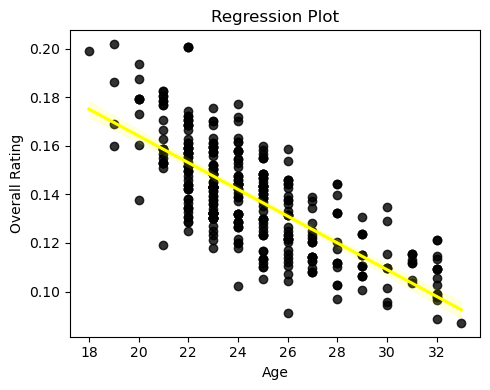

In [10]:
from scipy.stats import pearsonr

plt.figure(figsize=(5,4))
sns.regplot(x=df["Age"], y=df["div"], line_kws={"color": "yellow"}, scatter_kws={"color": "black"})
plt.title('Regression Plot')
plt.xlabel('Age')
plt.ylabel("Overall Rating")

r_value, _ = pearsonr(df["Age"], df["div"])
rounded_r_value = round(r_value, 2)
print(str(rounded_r_value)+" :מקדם מתאם הקורולציה")

plt.tight_layout()
plt.show()

**?ננסה להתעמק יותר בנתונים ונחפש הסבר מדוע בקרב משתמשים בוגרים יותר שביעות הרצון מהחברה יורדת**

*?נבדוק באיזה פרמטר הפער בין שביעות הרצון של הצעירים למבוגרים הכי גדולה**

***?נבדוק אולי בכך שהמשתמשים הבוגרים מזמינים יותר דרך אמצעי פחות חדיש כמו הגעה פיזית לסניף או טלפונית היא הגורמת לדירוג הנמוך***

-0.05 :מקדם מתאם הקורולציה


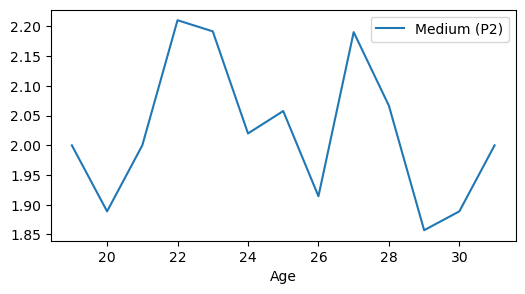

In [11]:
filtered_df = df[(df['Age'] >= 19) & (df['Age'] <= 31)]

med_df = filtered_df.groupby('Age')[['Medium (P2)']].mean()
#med_df = df.groupby('Age')[['Medium (P2)']].mean()    #evry year the sum of people impact

plt.figure(figsize=(6,3))
g = sns.lineplot(data = med_df)

r_value, _ = pearsonr(df["Age"], df['Medium (P2)'])
rounded_r_value = round(r_value, 2)
print(str(rounded_r_value)+" :מקדם מתאם הקורולציה")

**.כפי שניתן לראות אין קשר בין אמצעי ההזמנה לבין הגיל**

**:נחפש את הפרמטרים בהם ההפרש בין הצעירים והבוגרים הוא הגדול ביותר**

In [12]:
parm_df = df.groupby(['Age'])[['Ease and convenient', 'Time saving', 'Easy Payment option',
    'Good Food quality', 'Good Tracking system',
    'Self Cooking', 'Health Concern', 'Unavailability', 'Residence in busy location',
    'Unaffordable','Delivery person ability', 'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time','Less Delivery time',
    'High Quality of package', 'Number of calls', 'Politeness','Freshness ', 'Temperature', 'Good Taste ', 'Good Quantity',   
    'More restaurant choices','More Offers and Discount','Late Delivery', 'Poor Hygiene', 'Bad past experience', 'Long delivery time',
    'Delay of delivery person getting assigned','Delay of delivery person picking up food', 'Wrong order delivered',
    'Missing item', 'Order placed by mistake']].mean().reset_index().sort_values(by="Age" , ascending = True)

final_df = parm_df[(parm_df['Age'] >= 19) & (parm_df['Age'] <= 32)]  #הורדת קצוות


**: מצאנו שבפרמטרים הבאים הפער היה הגבוה ביותר**
1. נוחות התשלום
2. חוסר בהנחות והטבות
3. טעות בהזמנה    

In [13]:
# Calculate the difference between max and min for each column 
range_series = (final_df.set_index('Age').max() - final_df.set_index('Age').min()).round(1)

# Identify the top 34 columns with the highest range
top_34_changes = range_series.nlargest(3)

# Display the result
top_34_changes

Easy Payment option         2.0
More Offers and Discount    1.9
Wrong order delivered       1.9
dtype: float64

**:הקורלציה הגבוהה ביותר בין הגיל לבין הדירוג נמצאה דווקא בפרמטר של כמות ההנחות וההטבות**

0.72 :מקדם מתאם הקורולציה


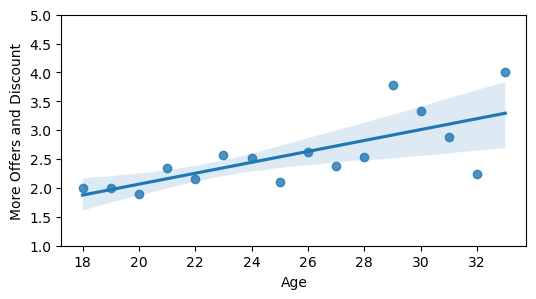

In [14]:
new_df = df.groupby(['Age'])[['Easy Payment option', 'Wrong order delivered', 'More Offers and Discount']].mean().reset_index().sort_values(by="Age" , ascending = True)

#שאלו אותם האם הם רוצים עוד הנחות_> 5 אומר צריך יותר המצב לא טוב. 1 אומר יש יותר מידי הנחות 
plt.figure(figsize=(6,3))
plt.ylim(1, 5)
sns.regplot(x='Age', y='More Offers and Discount', data=new_df)

r_value, _ = pearsonr(new_df["Age"], new_df['More Offers and Discount'])
rounded_r_value = round(r_value, 2)
print(str(rounded_r_value)+" :מקדם מתאם הקורולציה") 

**:מסקנה**

***.לחברת סוויגי יש פערים שונים בשביעות הרצון בקרב משתמשים יותר מבוגרים***

***:ניתן לשער כי פער זה בין המשתמשים הצעירים למבוגרים נובע ממספר גורמים***

1. .חוסר הטבות והנחות. למשתמשים הבוגרים חוסר זה השפיע רבות על מתן הציון הסופי לחברת סוויגי

2.  .פער טכנולוגי בין המשתמשים. חוסר ידע של המשתמשים המבוגרים בכלים טכנולוגיים כגון תשלום בכרטיס אשראי דרך הטלפון. ומנגד, יעילות של המערכת למשתמשים צעירים  
     

סתם:

In [15]:
age_counts = df['Age'].value_counts().reset_index()
age_counts.columns = ['Age', 'Count']
age_counts = age_counts.sort_values(by="Age")

# Display the result
age_counts

,Age,Count
14,18,1
13,19,4
10,20,9
5,21,23
1,22,57
0,23,73
3,24,50
2,25,52
4,26,35
6,27,21


In [16]:
df.describe()

,Age,Family size,latitude,longitude,Pin code,Medium (P2),Ease and convenient,Time saving,More restaurant choices,Easy Payment option,...,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Overall Rating,div_Overall Rating,div_Age,div
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,...,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402,2.072165,3.760309,3.744845,2.221649,3.590206,...,3.590206,3.865979,3.855670,3.958763,4.255155,4.211340,3.364261,0.138572,0.138572,0.138572
std,2.975593,1.351025,0.044489,0.051354,31.399609,0.678156,0.976082,1.124934,1.084228,1.167876,...,1.141017,1.028070,1.104276,0.919696,0.865264,0.904582,0.340525,0.021855,0.021855,0.021855
min,18.000000,1.000000,12.865200,77.484200,560001.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.375000,0.087121,0.087121,0.087121
25%,23.000000,2.000000,12.936900,77.565275,560010.750000,2.000000,4.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.125000,0.122870,0.122870,0.122870
50%,24.000000,3.000000,12.977000,77.592100,560033.500000,2.000000,4.000000,4.000000,2.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.333333,0.139156,0.139156,0.139156
75%,26.000000,4.000000,12.997025,77.630900,560068.000000,3.000000,4.000000,5.000000,3.000000,4.000000,...,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.583333,0.152778,0.152778,0.152778
max,33.000000,6.000000,13.102000,77.758200,560109.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.416667,0.201754,0.201754,0.201754


In [17]:
#scatter and box
columns_to_div = ['Overall Rating', 'Age']



# יצירת עמודה חדשה 'div' עם תוצאה של החילוק של כל עמודה ברשימה בעמודת Age
for column in columns_to_div:
    df[f'div_{column}'] =  df['Age']  / df["Overall Rating"] 

div_df = df[[f'div_{column}']]

div_df

,div_Age
0,7.272727
1,7.890411
2,6.947368
3,6.211765
4,7.040000
...,...
383,7.561644
384,7.666667
385,7.436620
386,6.731707


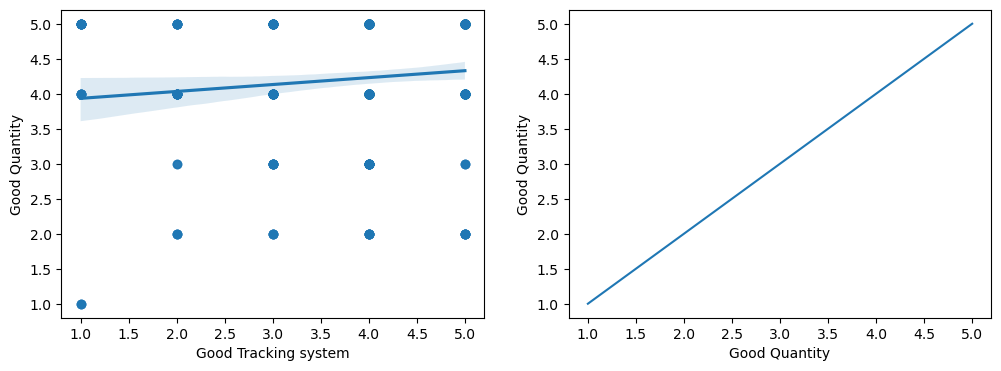

In [18]:
ig, axes = plt.subplots(figsize=(12, 4), ncols=2)
sns.regplot(x = "Good Tracking system", y = "Good Quantity" , data= df , ax=axes[0])
sns.lineplot(x="Good Quantity", y="Good Quantity",   estimator = 'mean',   data=df,errorbar=None, ax=axes[1])
plt.show()

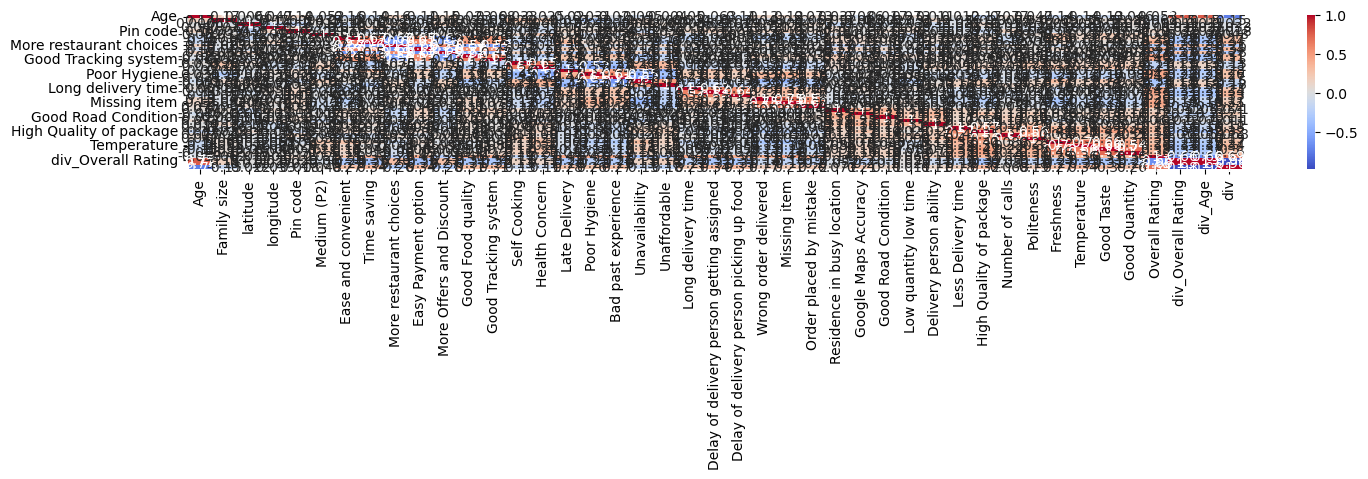

In [19]:
numeric_columns = df.select_dtypes(include='number')

# Create a new DataFrame with only numeric values
numeric_df = df[numeric_columns.columns]

correlation_matrix = numeric_df.corr(numeric_only = True, method = 'spearman' ).round(2)
subset_correlation_matrix = correlation_matrix['Age'].transpose()
plt.figure(figsize=(17,2))
subset_correlation_matrix = numeric_df.corr()
sns.heatmap(data=subset_correlation_matrix,cmap='coolwarm', annot=True, xticklabels=numeric_df.columns.tolist())
plt.show()

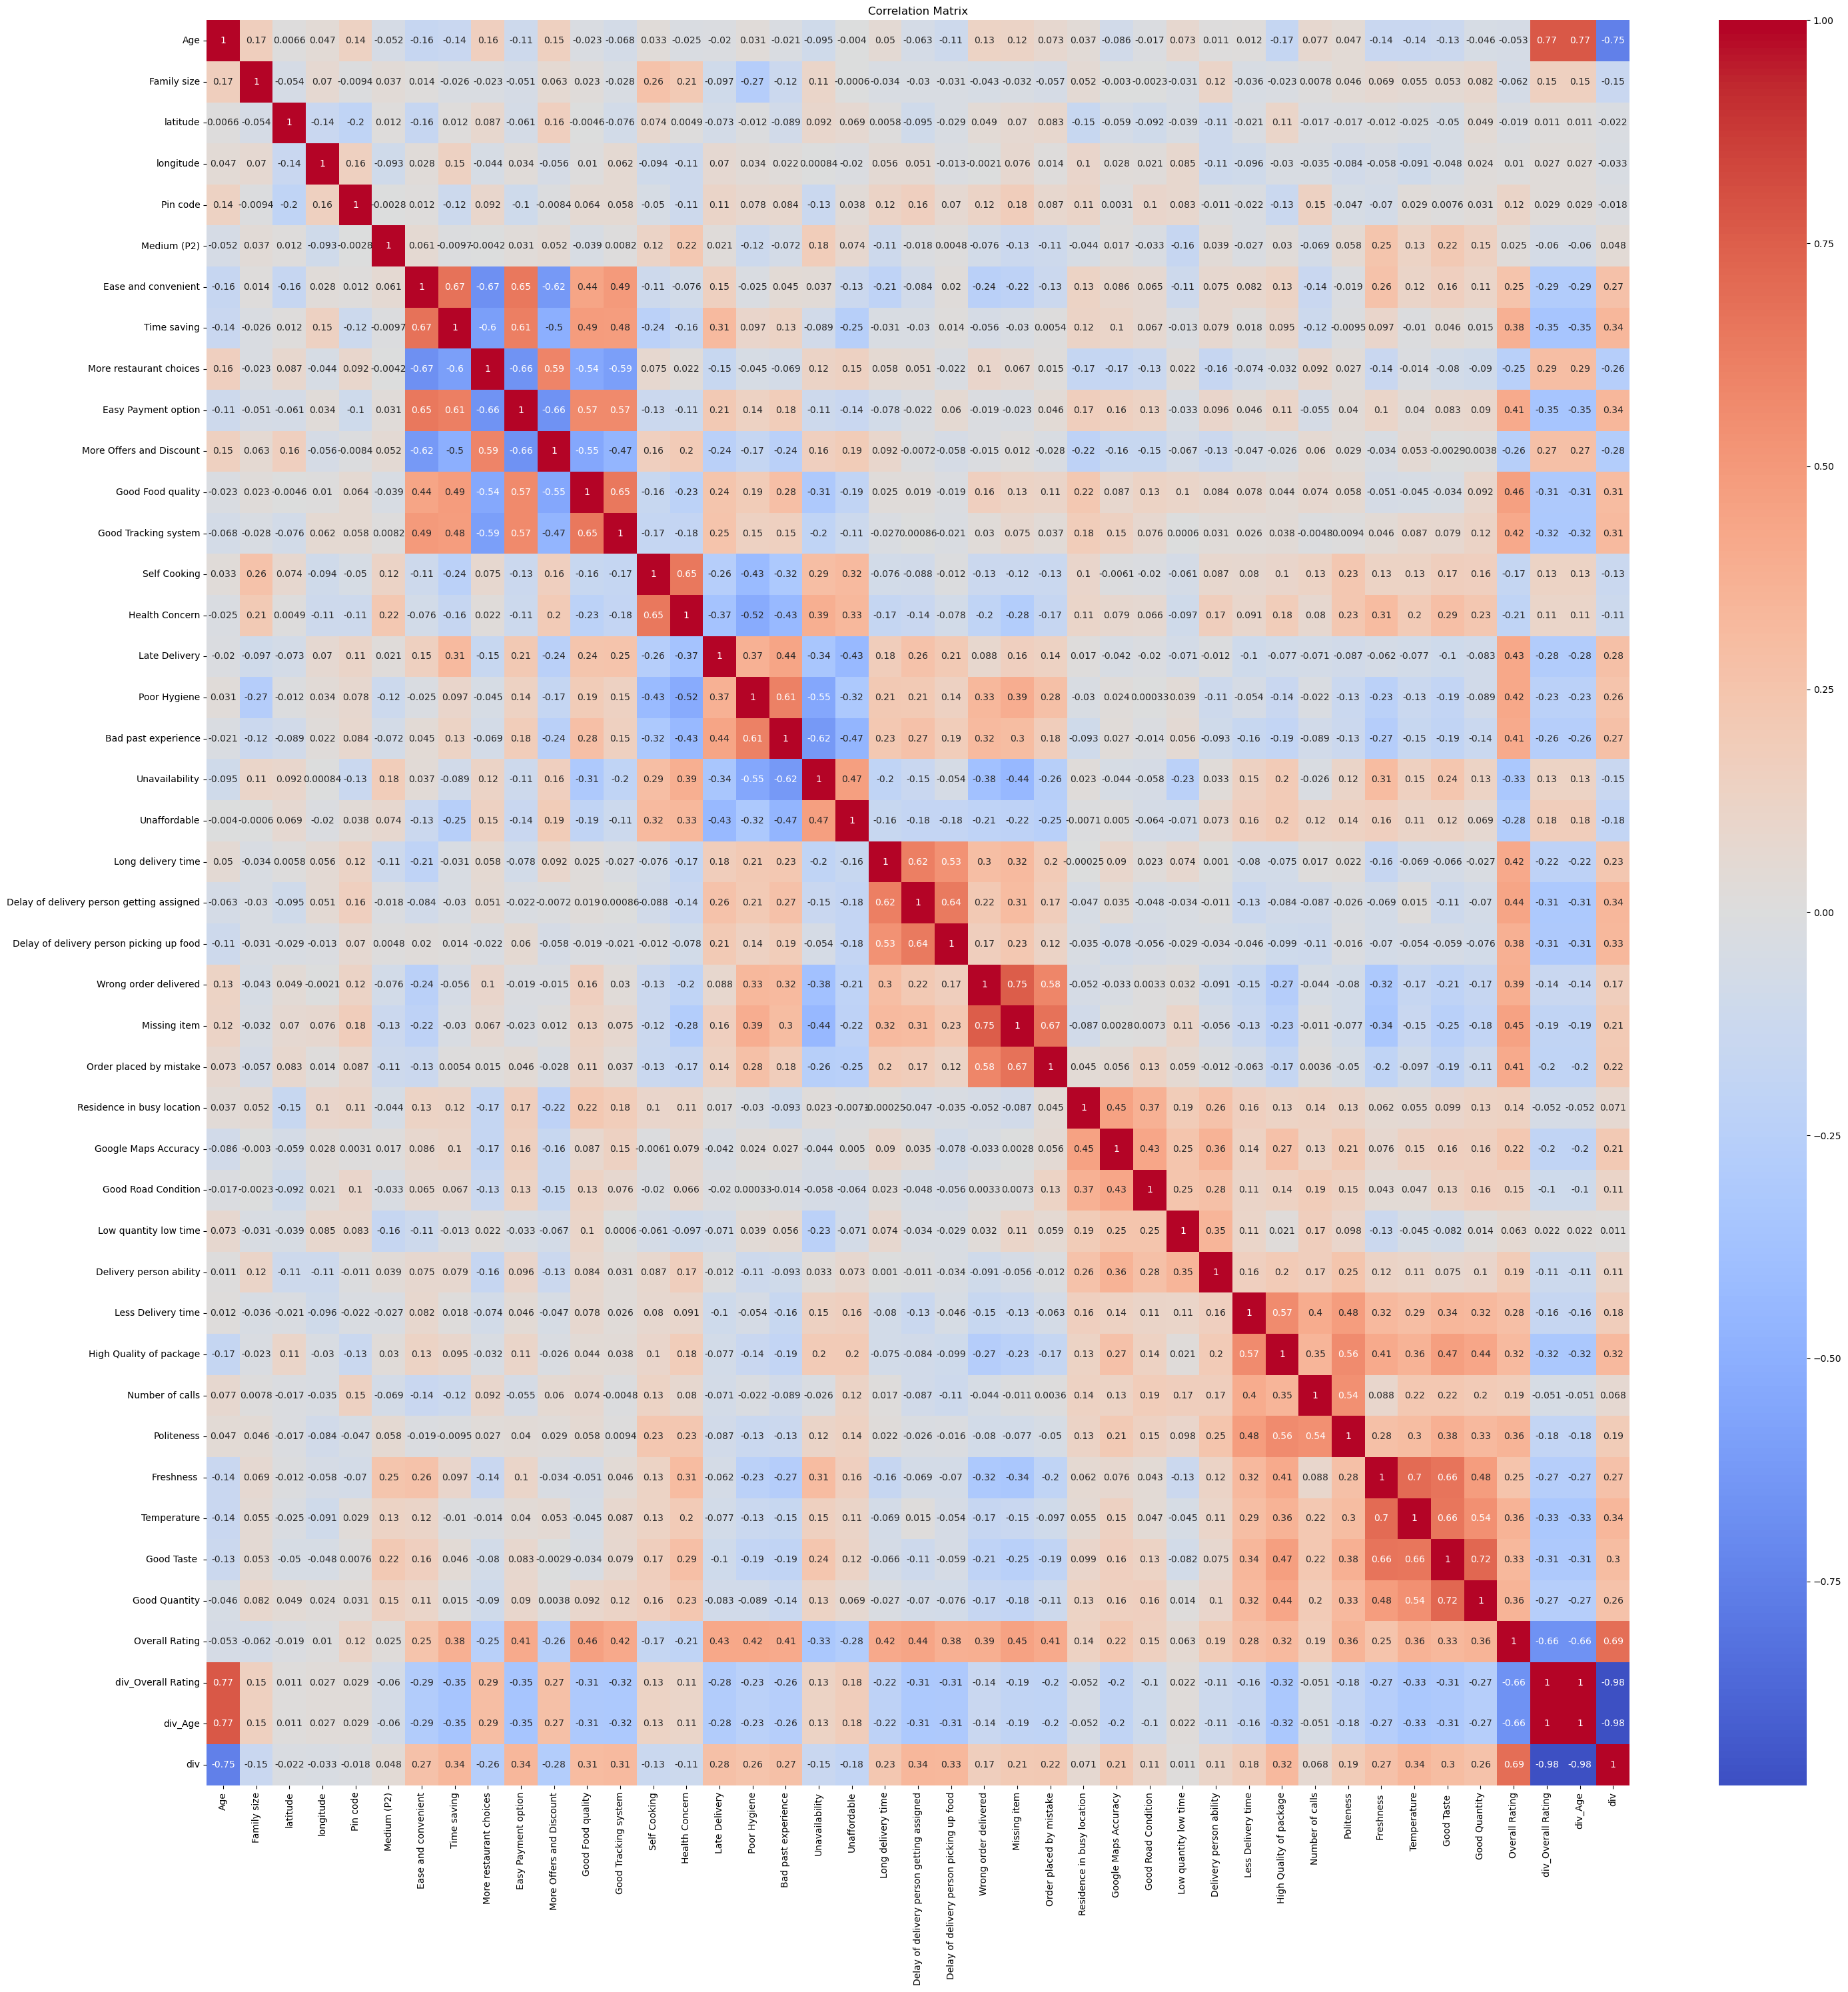

In [20]:
corrs = df.corr(method='pearson', numeric_only=True)
plt.figure(figsize=(30,30))  # אפשר לשנות לגודל המתאים
sns.heatmap(corrs, cmap='coolwarm', center=0, annot=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

<Axes: >

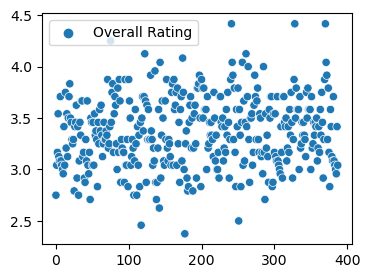

In [21]:
plt.figure(figsize=(4,3))  #figure size
sns.scatterplot(data = df[['Overall Rating']])

In [22]:
med_df = df.groupby('Age')[['Long delivery time']].count()  #evry year the sum of people impact
med_df

,Long delivery time
Age,
18,1
19,4
20,9
21,23
22,57
23,73
24,50
25,52
26,35


In [23]:
men_df = df.groupby('Age')[["Over All Satisfaction"]].mean().head(10)    #evry year the sum of people impact
top_5 = men_df.sort_values(by="Over All Satisfaction", ascending=False).head(10)
top_5

KeyError: "Columns not found: 'Over All Satisfaction'"

In [ ]:
age_diff = final_df.set_index('Age').diff().dropna()

# Unpivot the DataFrame to have one row per age difference and category
melted_diff = age_diff.reset_index().melt(id_vars='Age', var_name='Category', value_name='Difference')

# Sort by the absolute difference and take the top 34 changes
top_34_changes = melted_diff.iloc[melted_diff['Difference'].abs().argsort()[-34:]]

# Display the result
top_34_changes